In [ ]:
#Reference: https://kazemnejad.com/blog/transformer_architecture_positional_encoding/

In [64]:
import torch
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 10

In [101]:
D = 128
T = 80

even_idx = torch.arange(0,D,2)
odd_idx = torch.arange(1,D,2)

weight = torch.ones(D//2) * (1/10000) ** (2*torch.arange(D//2)/D)

embed = torch.ones((D,T))



In [102]:
weight

tensor([1.0000e+00, 8.6596e-01, 7.4989e-01, 6.4938e-01, 5.6234e-01, 4.8697e-01,
        4.2170e-01, 3.6517e-01, 3.1623e-01, 2.7384e-01, 2.3714e-01, 2.0535e-01,
        1.7783e-01, 1.5399e-01, 1.3335e-01, 1.1548e-01, 1.0000e-01, 8.6596e-02,
        7.4989e-02, 6.4938e-02, 5.6234e-02, 4.8697e-02, 4.2170e-02, 3.6517e-02,
        3.1623e-02, 2.7384e-02, 2.3714e-02, 2.0535e-02, 1.7783e-02, 1.5399e-02,
        1.3335e-02, 1.1548e-02, 1.0000e-02, 8.6596e-03, 7.4989e-03, 6.4938e-03,
        5.6234e-03, 4.8697e-03, 4.2170e-03, 3.6517e-03, 3.1623e-03, 2.7384e-03,
        2.3714e-03, 2.0535e-03, 1.7783e-03, 1.5399e-03, 1.3335e-03, 1.1548e-03,
        1.0000e-03, 8.6596e-04, 7.4989e-04, 6.4938e-04, 5.6234e-04, 4.8697e-04,
        4.2170e-04, 3.6517e-04, 3.1623e-04, 2.7384e-04, 2.3714e-04, 2.0535e-04,
        1.7783e-04, 1.5399e-04, 1.3335e-04, 1.1548e-04])

<AxesSubplot:>

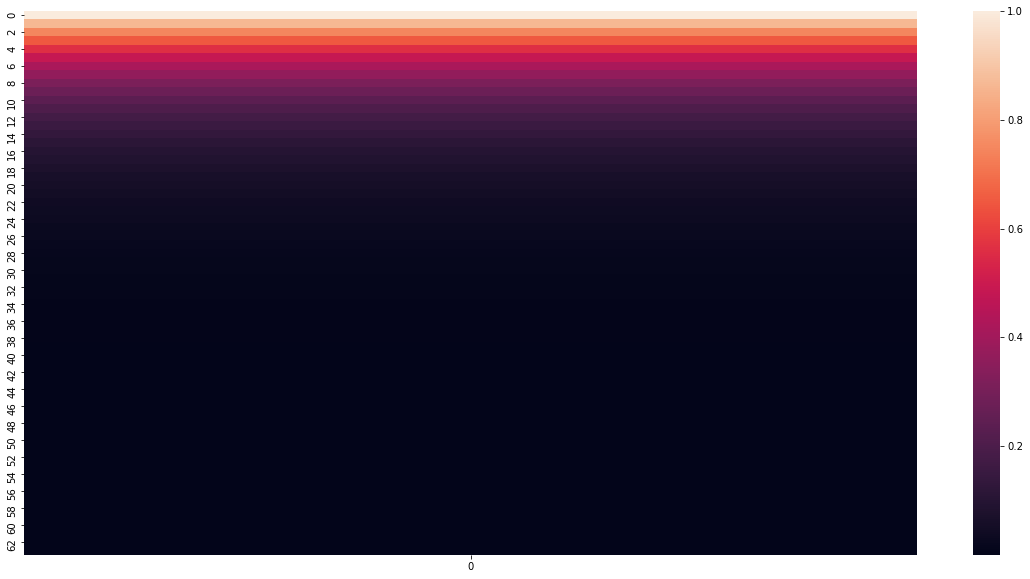

In [110]:
sn.heatmap(weight.unsqueeze(1))

In [103]:
for t in range(T):
    
    embed[odd_idx,t] = torch.cos(weight * t)
    embed[even_idx,t] = torch.sin(weight * t)

embed.t_()

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  7.6172e-01,  ...,  1.0000e+00,
          1.1548e-04,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  9.8705e-01,  ...,  1.0000e+00,
          2.3096e-04,  1.0000e+00],
        ...,
        [ 9.9952e-01, -3.0975e-02, -6.4865e-01,  ...,  9.9995e-01,
          8.8917e-03,  9.9996e-01],
        [ 5.1398e-01, -8.5780e-01, -1.0000e+00,  ...,  9.9995e-01,
          9.0072e-03,  9.9996e-01],
        [-4.4411e-01, -8.9597e-01, -6.4717e-01,  ...,  9.9994e-01,
          9.1227e-03,  9.9996e-01]])

<AxesSubplot:>

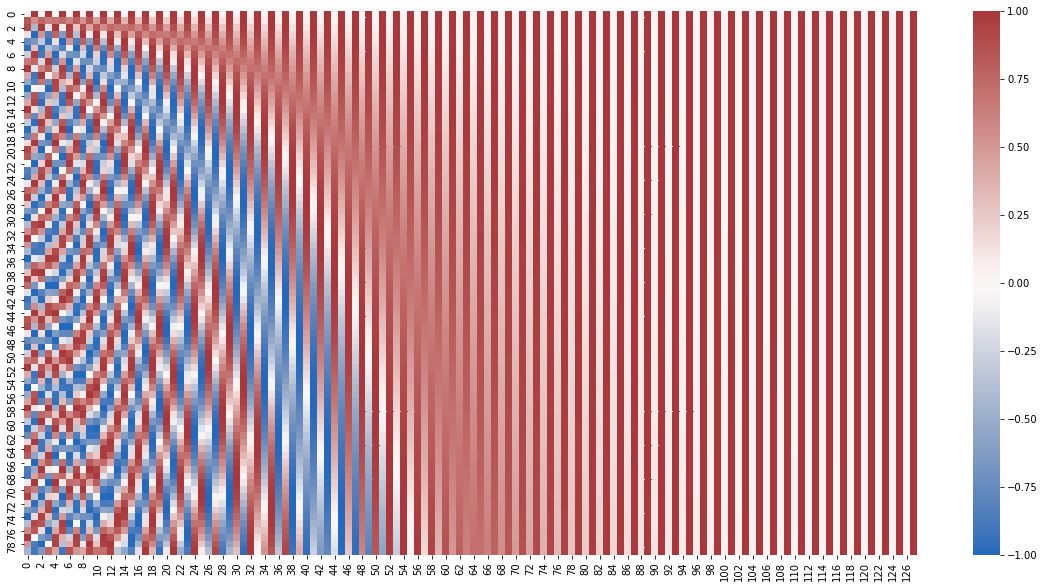

In [104]:
sn.heatmap(embed, cmap='vlag')

<AxesSubplot:>

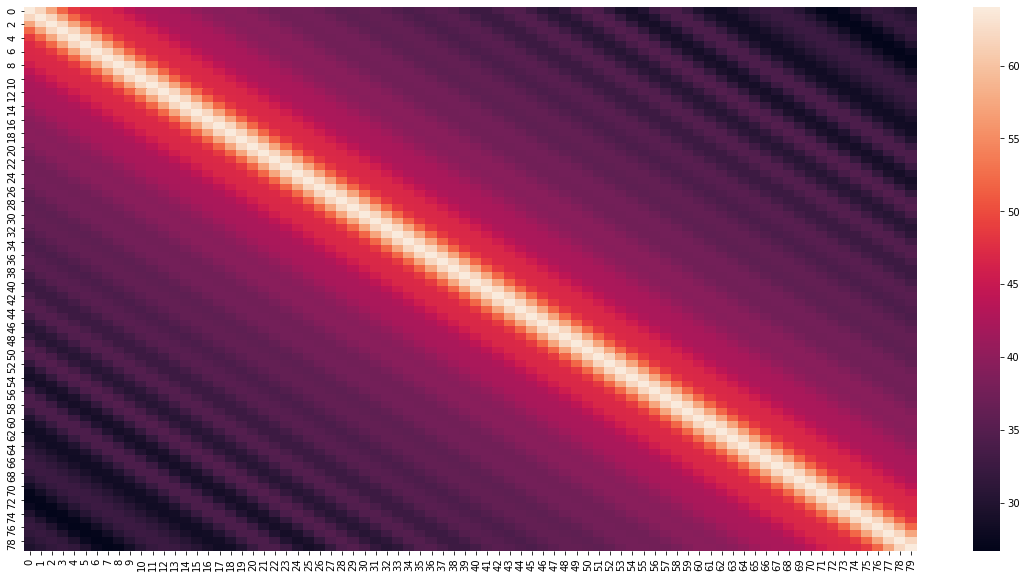

In [112]:
sn.heatmap(embed @ embed.t())

In [105]:
grid = torch.ones((20,80,D))

In [106]:
embed.shape

torch.Size([80, 128])

In [107]:
for x in range(20):
    for y in range(80):
        
        grid[x,y,:] = embed[x,:] + embed[y,:]

<AxesSubplot:>

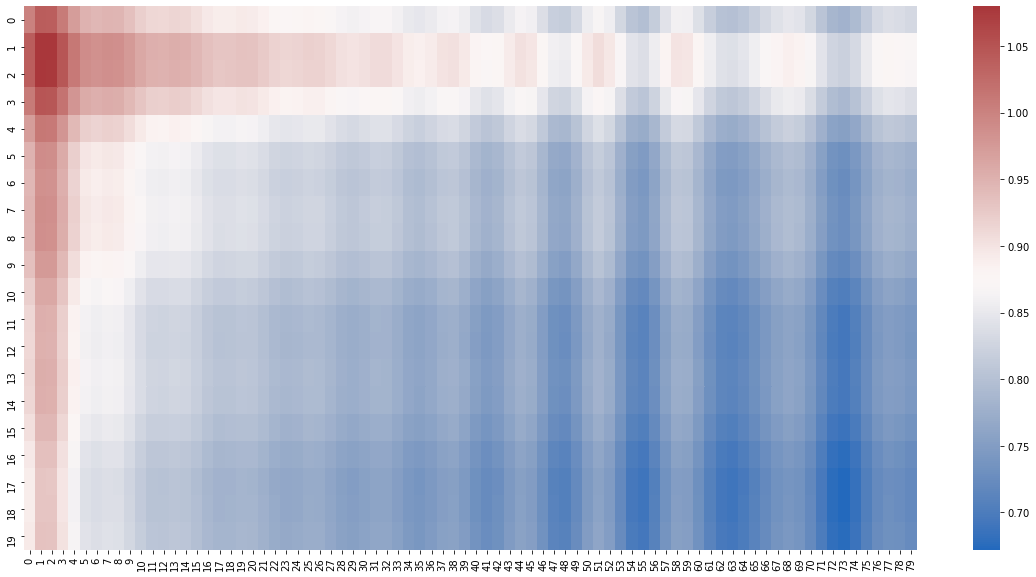

In [108]:
grid_mean = grid.mean(dim=2)
sn.heatmap(grid_mean, cmap='vlag')